# 1. Dictionary-based morphological analysis

`-` Lexical dictionary (어휘 사전)을 이용해서 문장을 형태소 분석하는 것.

감기는

1. `left to right`
- 감 (NULL) -> 사전에 없으므로 '감기'로 확장해서 탐색
- 감기/NOUN, 감기/VERB -> 사전에 있으므로 저장하고 '는'으로 탐색 전환
- 는/JOSA -> 사전에 있으므로 저장
- 가능한 경우의 수 = 감기/NOUN + 는/JOSA , 감기/VERB + 는/JOSA
  
2. `right to left`
- 는/JOSA
- 기/EOMI
- 감 (NULL) -> 사전에 없으므로 '감기'로 확장해서 탐색 (한글을 읽는 방향은 `left to right`라서 확장 방향도 `left to right`이다.
- 가능한 경우의 수 = 감기/NOUN + 는/JOSA , 감기/VERB + 는/JOSA

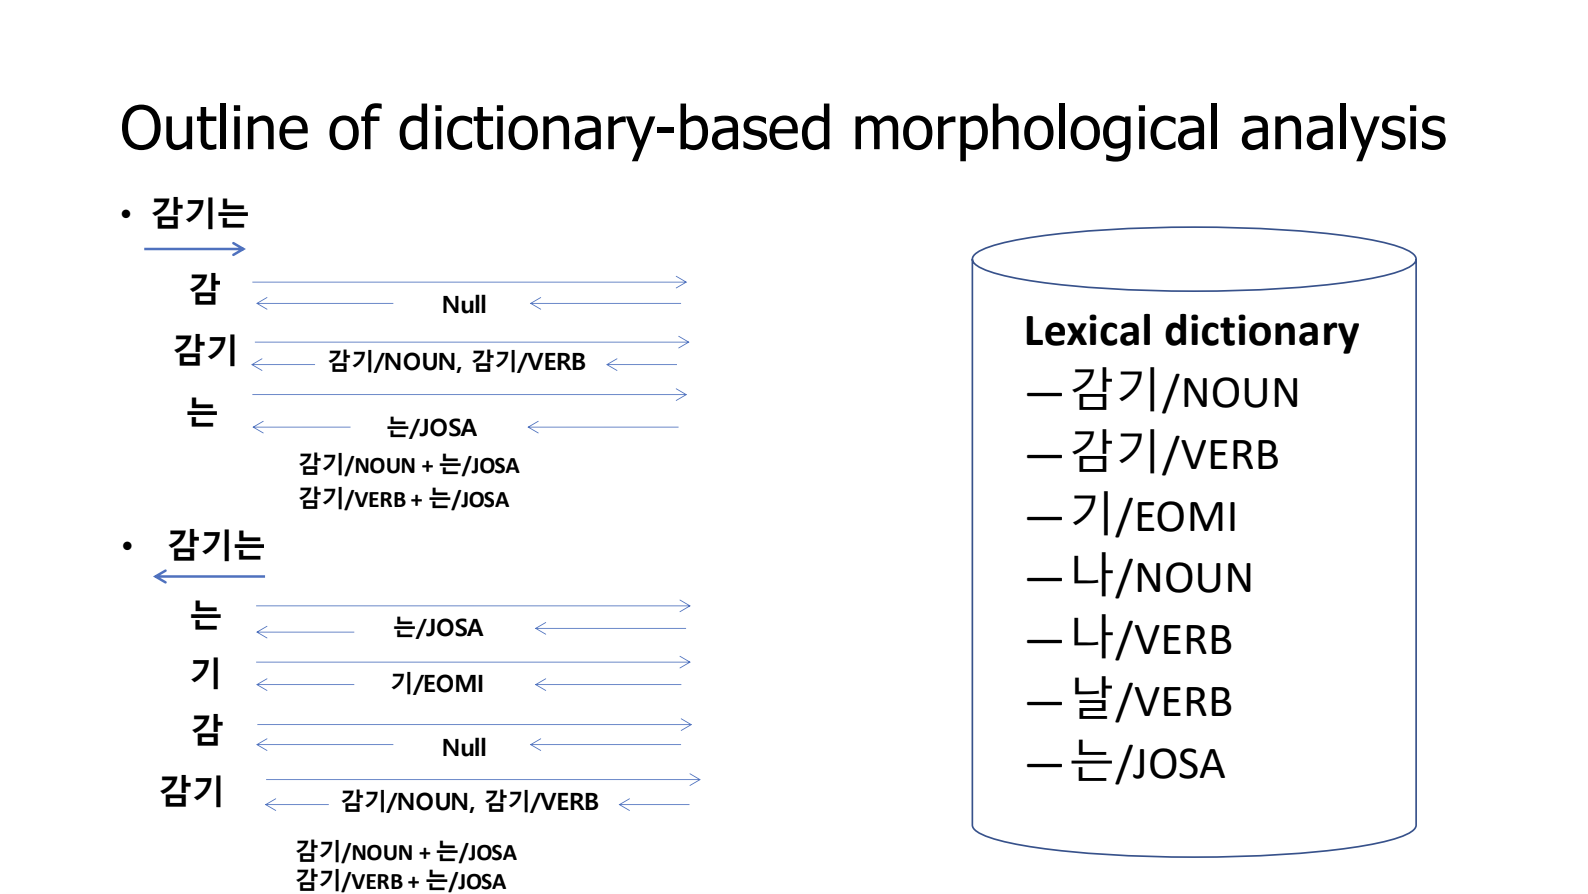

`-` Problem : 후보가 너무 많이 생긴다.

-> 애초에 불가능한 후보는 저장하지 말자.

`-` Solution : Tabular Parsing

# 2. Tabular Parsing

`Connection information`을 활용하여 불가능한 조합을 제거한다.

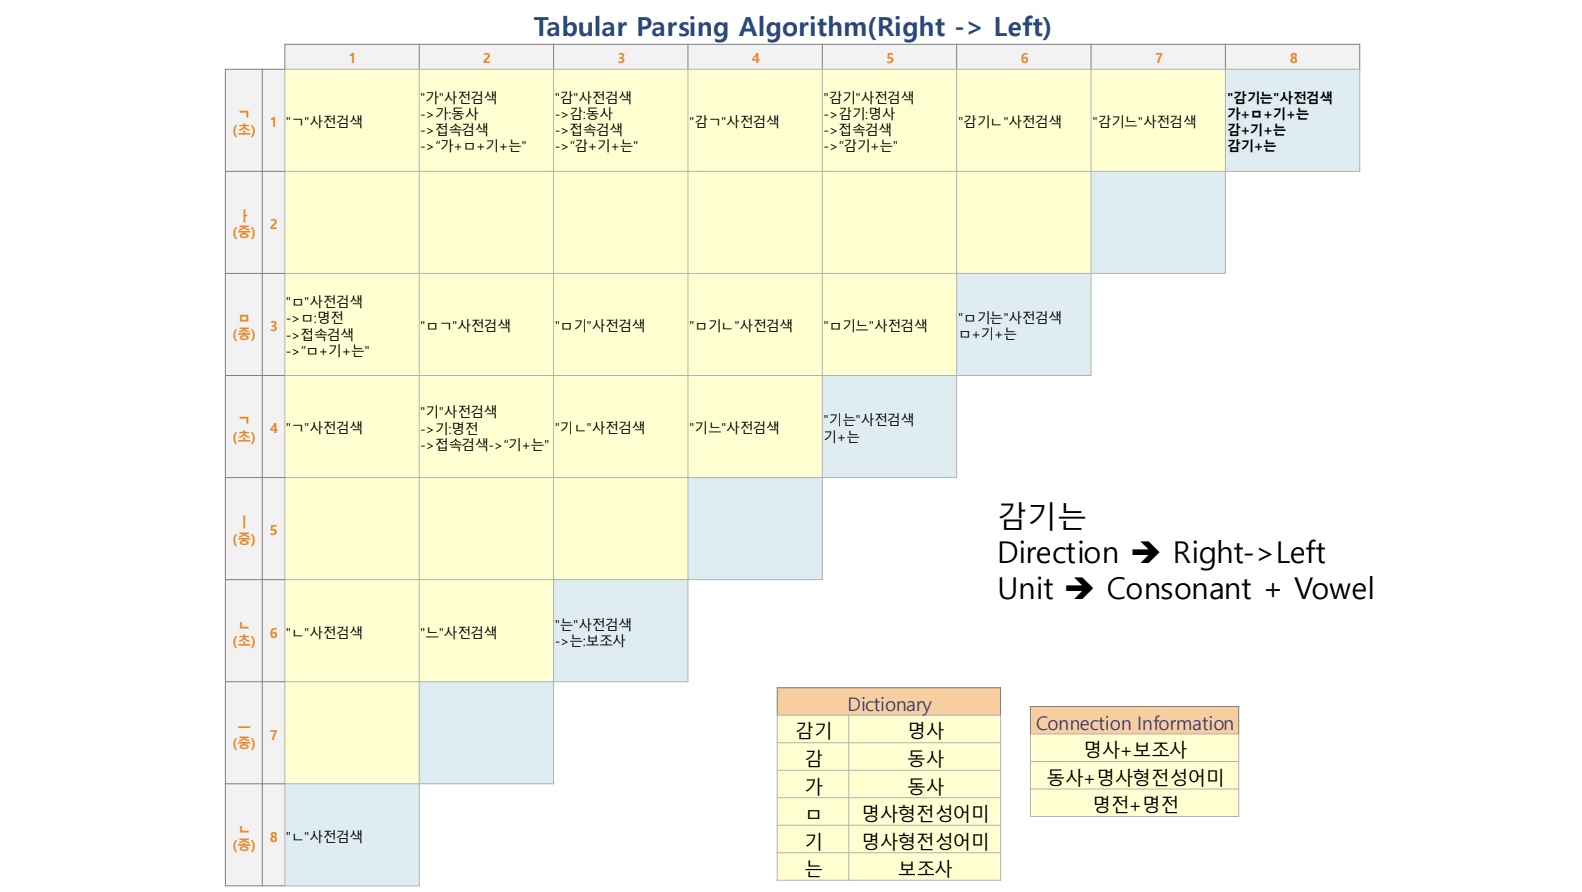

'감기는'을 `right to left`로 분석해보자.

'는'
1. '감기는'은 'ㄴ'부터 시작
2. 'ㄴ'은 사전에 없기때문에 확장해서 검색
3. 중성 'ㅡ'과 종성 'ㄴ'으로는 조합이 불가능하기때문에 중성은 skip한다
4. 초성 'ㄴ'부터 검색 (없음) -> '느' 검색 (없음) -> '는' 검색해보고 사전에 있으므로 저장

'기는'
1. '기는'에서 '는'은 했기에 '기' 중에서 'ㅣ'부터 시작 -> 중성은 조합이 불가능하기에 skip
2. 'ㄱ' 검색 (없음) -> '기' 검색해보면 사전에 있으므로 '기'+'는' 접속이 가능한지 확인
3. 가능하기때문에 '기'+'는' 저장
4. 남은 경우의 수도 확인해보기 위해서 '기ㄴ' 검색 (없음) -> '기느' 검색 (없음)
5. '기'+'는'만 가능하기에 저장

'감기는'
1. '기는'은 했기때문에 '감'부터 시작
2. 'ㅁ' 검색해보면 사전에 있기때문에 'ㅁ'과 '기'+'는'을 결합 확인 -> 가능하므로 'ㅁ'+'기'+'는' 저장
3. 남은 경우의 수 확인 -> 'ㅁㄱ' (없음) -> 'ㅁ기' (없음) -> 'ㅁ기ㄴ' (없음) -> 'ㅁ기느' (없음)
4. 'ㅁ'+'기'+'는'만 저장
5. 중성 'ㅏ'는 skip
6. 'ㄱ' 검색 (없음) -> '가' 검색해보면 사전에 있기때문에 '가'+'ㅁ'+'기'+'는'이 가능한지 확인
7. 가능하므로 저장 '가'+'ㅁ'+'기'+'는' 저장
8. 이어서 '감' 검색해보니 사전에 있음 -> '감'+'기'+'는' 가능한지 확인 후 가능하므로 저장
9. '감ㄱ' 검색 (없음) -> '감기' 검색해보니 있음 -> '감기'+'는' 가능하므로 저장
10. '감기ㄴ' 검색 (없음) -> '감기느' 검색 (없음)

가능한 것은 저장한 것이므로 **'ㅁ'+'기'+'는'**, **'가'+'ㅁ'+'기'+'는'**, **'감기'+'는'**으로 총 3가지 가능하다.

## 2-1. Time complexity

`-` Problem : Tabular Parsing은 $O(n^3)$이므로 보다 효율적인 방법이 필수적이다.

## 2-2. Longest/Shortest Match Analysis

`Tabular Parsing`의 Time complexity 문제를 해결하기 위해서 `Longest/Shortest Match Analysis` 방식을 이용한다.

`-` 형태소 분석에서 문자열을 어떤 방식으로 나눌지 결정할 때 우선순위(Priority) 에 따라 처리 순서를 결정함.

1. Longest Match (가장 긴 형태소 우선)

가능한 가장 긴 단어부터 사전에 있는지 확인
- 예: 감기는
    - → 감기/NOUN + 는/JOSA
- 결과: 형태소 2개

Longest match는 분석 속도가 빠르지만, 모호성을 유발할 수 있다.

2. Shortest Match (가장 짧은 형태소 우선)

가능한 가장 짧은 단어부터 사전에 있는지 확인
- 예: 감기는
    - → 감/NOUN + 기/EOMI + 는/JOSA
- 결과: 형태소 3개

Shortest match는 더 많은 조합을 고려하지만 느릴 수 있다.